<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch04_02_%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9CEDA_diamonds_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.02. 회귀문제 EDA - diamonds
---
* 날짜:
* 이름:

## 학습내용
    - diamonds 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

* seaborn에서 제공하는 `diamonds` 데이터셋을 불러오기

In [2]:
df = sns.load_dataset('diamonds')
df.shape

(53940, 10)

* 데이터셋 일부 확인

In [3]:
df.head()
#df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* 결측지 비율 확인

In [5]:
df.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* 숫자 자료형의 기술 통계

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* 숫자 자료형 외의 기술 통계

In [10]:
df.describe(include='category')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


* 숫자 자료형 외 값 및 개수 확인

In [15]:
for col in ['cut', 'color', 'clarity']:
  print(col)
  print(df[col].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

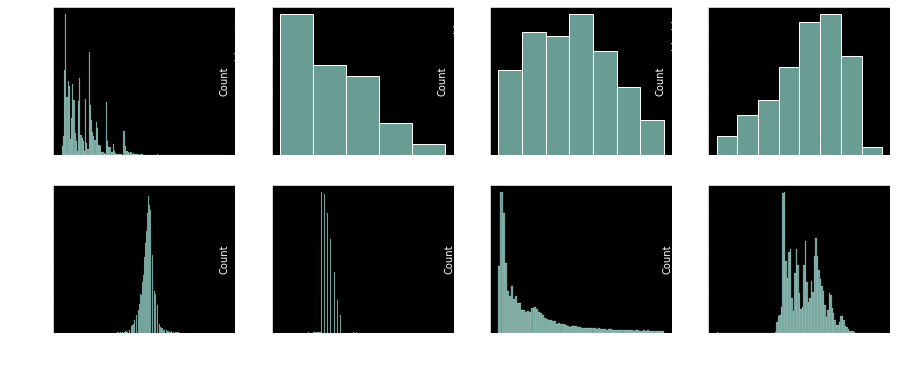

In [16]:
f, axes = plt.subplots(2,4, figsize=(15,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [29]:
nums = ['cut', 'color',	'depth', 'price']
noms = ['carat', 'x']
y = 'darity'
print('숫자/연속 자료형',nums)
print('범주 자료형', noms)
print('예측할 속성', y)

숫자/연속 자료형 ['cut', 'color', 'depth', 'price']
범주 자료형 ['carat', 'x']
예측할 속성 darity


* 데이터 정리하기
  * 데이터 소개: 
  * 자료형 소개
  * 모델링을 위한 자료형 구분:



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

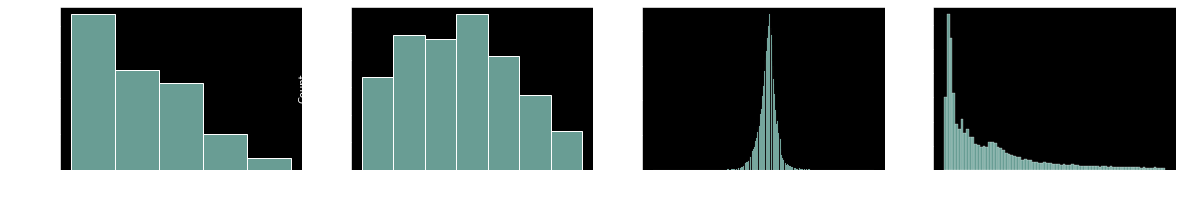

In [23]:
f, axes = plt.subplots(1, len(nums), figsize=(20,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

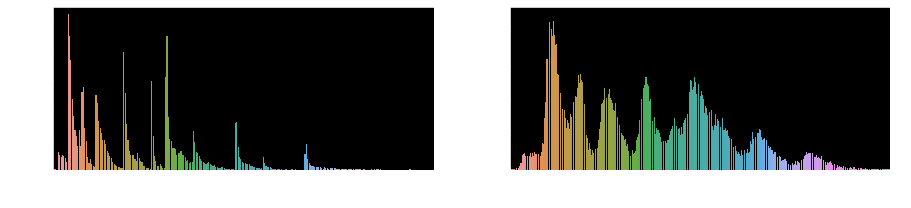

In [30]:
f, axes = plt.subplots(1, len(noms), figsize=(15,3))
axes = axes.flatten()
for col, ax in zip(noms, axes):
  sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [25]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

TypeError: ignored

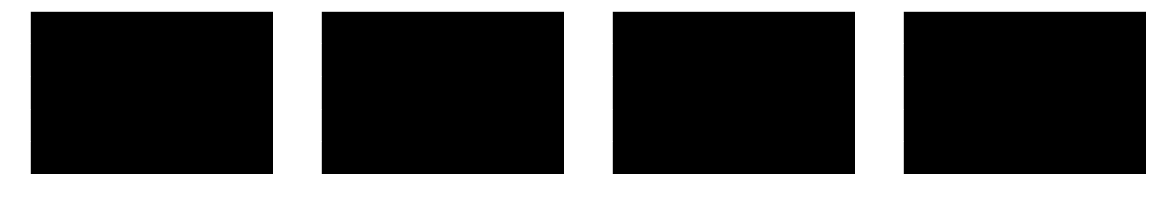

In [31]:
f, axes = plt.subplots(1, len(nums), figsize=(20,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.boxplot(data=df, x=col, ax=ax)
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

TypeError: ignored

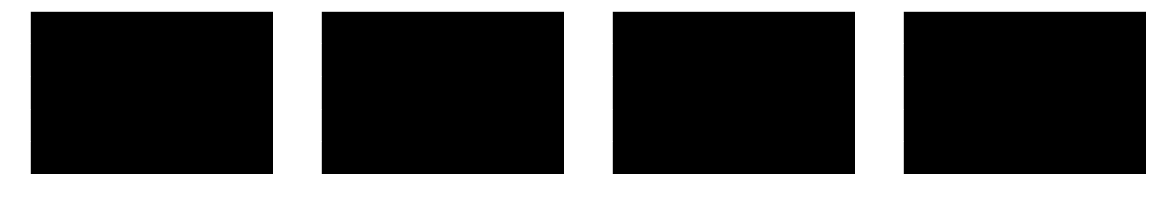

In [32]:
f, axes = plt.subplots(1, len(nums), figsize=(20,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.violinplot(data=df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [33]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

* `kurt` 이용해 첨도 구하기

In [34]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `displot`으로 그리기


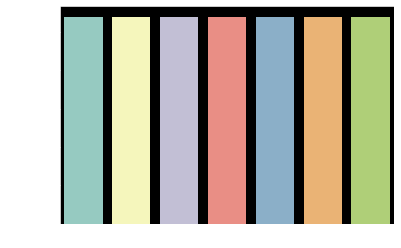

In [43]:
_=sns.countplot(data=df)

* `boxplot`으로 기술통계 시각화 하기

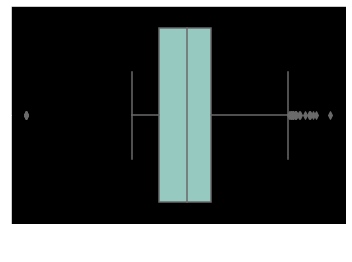

In [45]:
_=sns.boxplot(data=df,x='x')

* `violinplot`으로 기술통계 시각화 하기

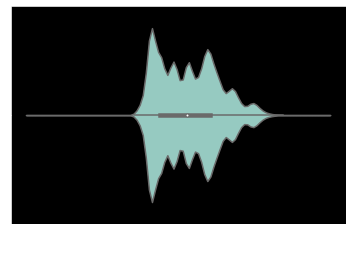

In [46]:
_=sns.violinplot(data=df,x='x')

* `describe` 로 `price`의 기술통계 값 구하기

In [47]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

* `price` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [48]:
df['price'].agg(['mean', 'min', 'max', 'skew','kurt'])

mean     3932.799722
min       326.000000
max     18823.000000
skew        1.618395
kurt        2.177696
Name: price, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [49]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [52]:
df.corr().style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

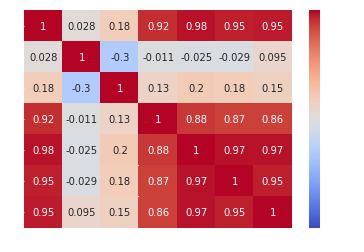

In [53]:
_=sns.heatmap(df.corr(), cmap='coolwarm',annot=True, vmax=1, vmin=-1)

* 예측값과 관련있는 속성 순서대로 정리하기

In [ ]:
s

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

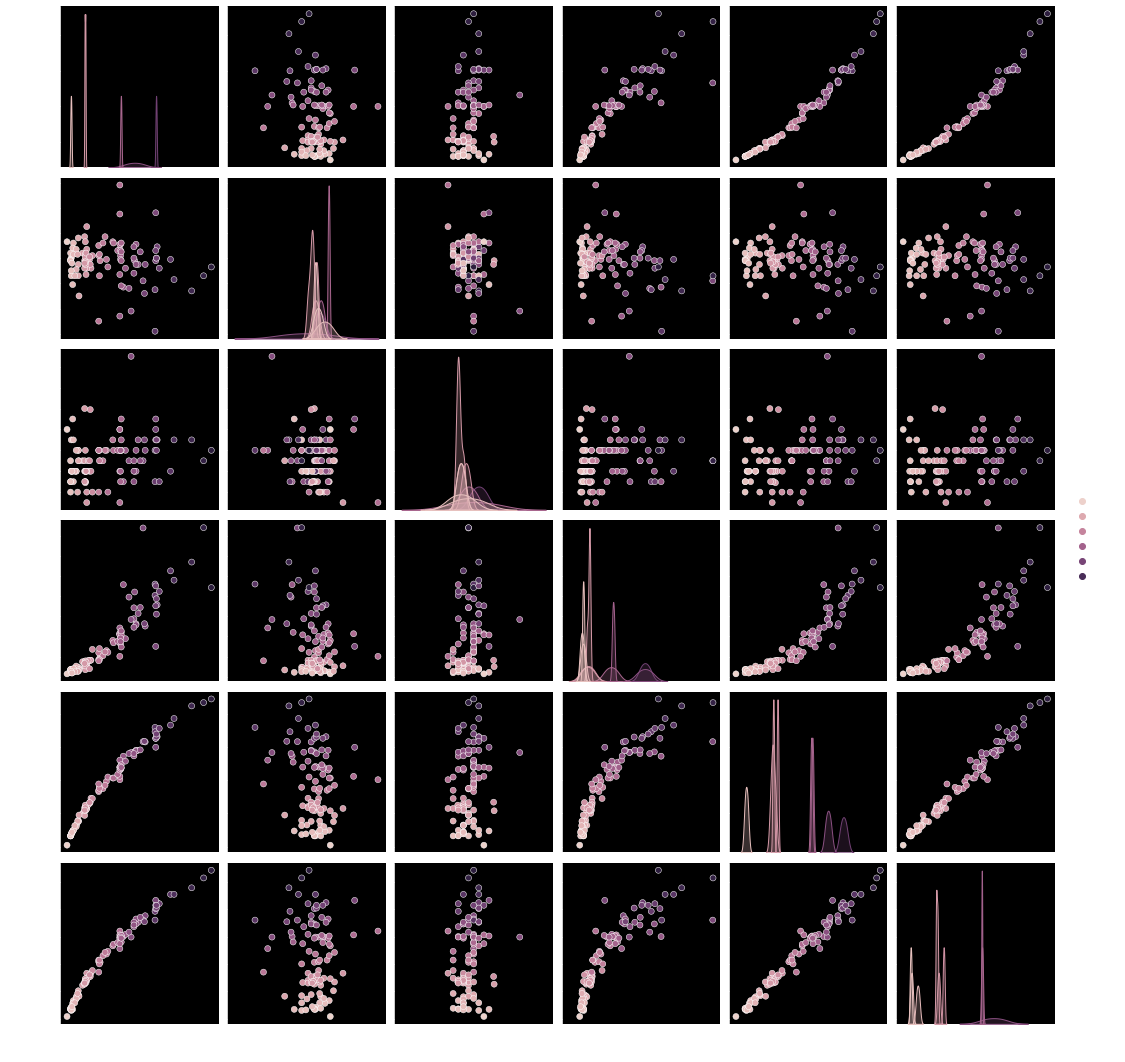

In [55]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
_=sns.pairplot(df.sample(100), hue='x')

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

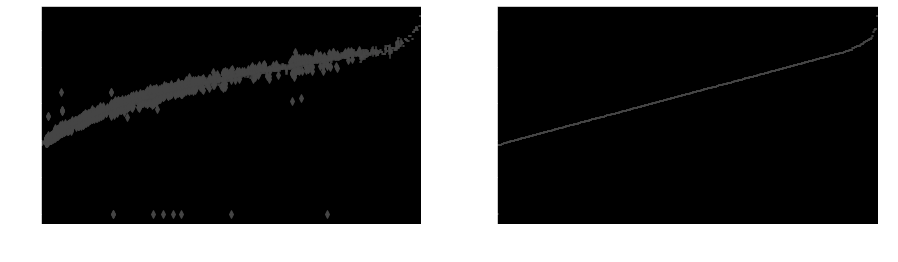

In [57]:
fig, axes = plt.subplots(1,len(noms), figsize=(15,4))
axes = axes.flatten()
for nom, ax in zip(noms,axes):
  _=sns.boxplot(data=df, x=nom, y='x', ax=ax)

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

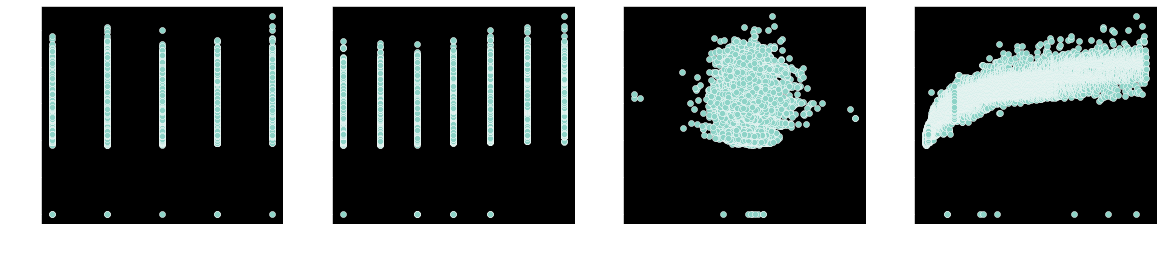

In [58]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='x', ax=ax)

* `hue` 옵션에 `color` 추가해서 그리기 

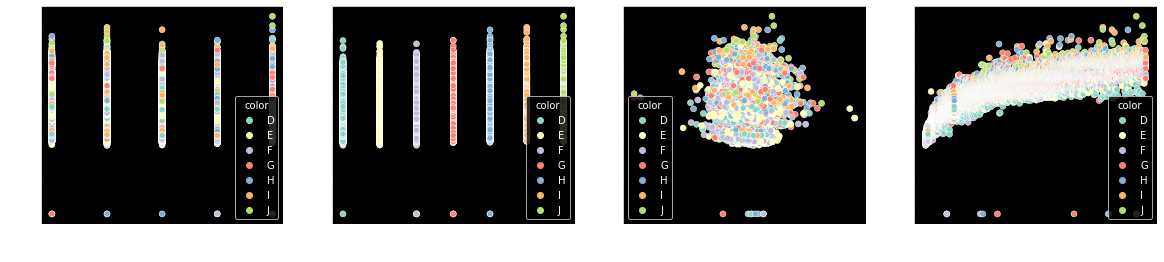

In [60]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='x', ax=ax, hue='color')

* `regplot`으로 회귀 시각화

TypeError: ignored

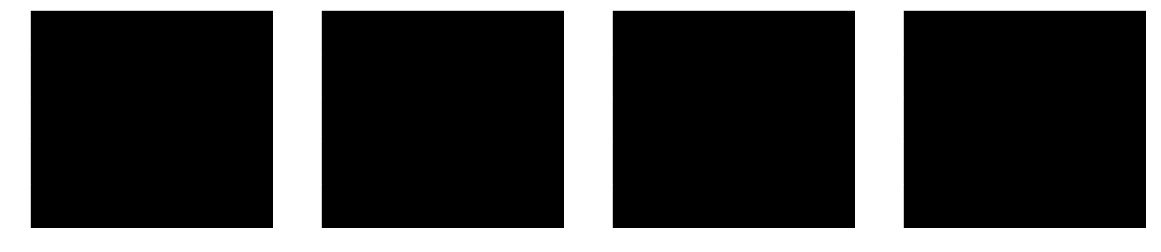

In [66]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.regplot(data=df, x=col, y='depth', ax=ax)

* `residplot`으로 잔차 시각화

TypeError: ignored

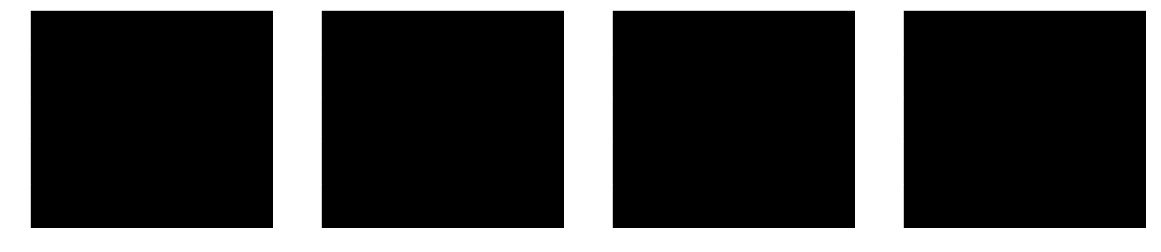

In [67]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.residplot(data=df, x=col, y='x', ax=ax)

* `lmplot`으로 `color`별 회귀 시각화

In [ ]:
sns.lmplot52112

ValueError: ignored

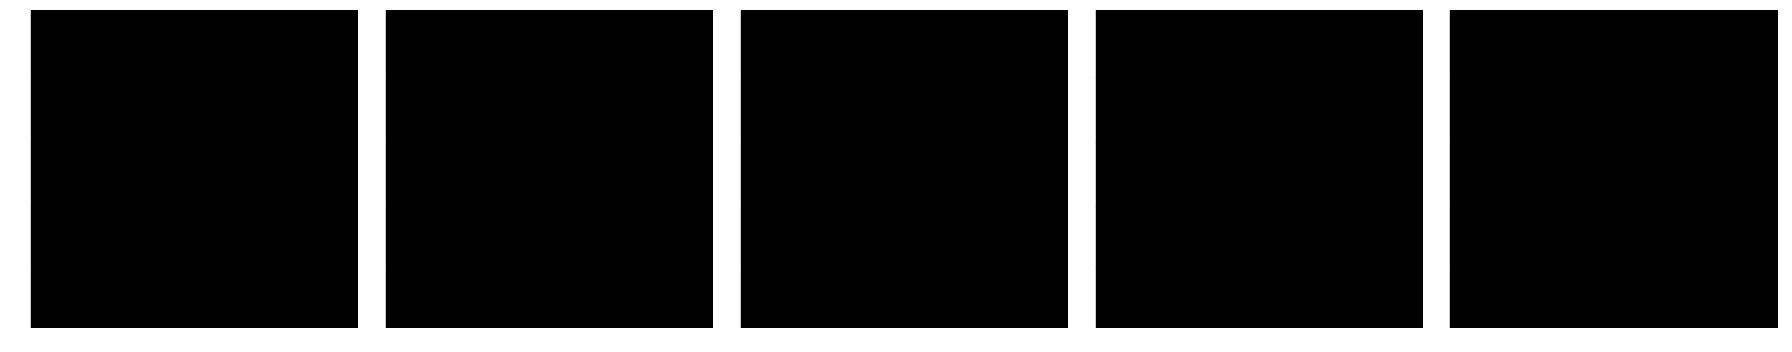

In [69]:
for col, ax in zip(nums, axes):
  sns.lmplot(data=df, x=col, y='x', col='cut', hue='color')
  plt.show()